# Определение перспективного тарифа для телеком-компании

   Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
    
   Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
   
   Описание тарифов
   
Тариф «Смарт»
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

### Изучение данных из файла

In [1]:
# подключим необходимые библиотеки для исследования 
import numpy as np
import scipy.stats as stats

from tqdm import tqdm

%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Изучим таблицу о пользователях:

In [2]:
users=pd.read_csv('/datasets/users.csv')
display(users.head(10))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

In [3]:
# рассмотрим общую инфо (количество строк и тип данных, а также есть ли пропуски)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Существуют пропуски в столбце дата прекращения пользования. Эти данные в исследовании использованы не будут, поэтому оставим данные как есть.

Проверим данные на неявные дубли, для этого рассмотрим уникальные значения в столбцах тариф и город:

In [4]:
users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

In [5]:
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Визуально дублей не обнаружено.

Теперь обработаем 'reg_date' в datetime, чтобы в дальнейшем выделить месяц:

In [6]:
users['reg_date']=pd.to_datetime(users['reg_date'],format='%Y-%m-%d')
#users.info()

In [7]:
# на всякий случай проверим на явные дубликаты
users.duplicated().sum()

0

Теперь посмотрим таблицу со звонками:

In [8]:
calls=pd.read_csv('/datasets/calls.csv')
display(calls.head(5))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Таблица calls (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

In [9]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Пропусков нет, проверим на дубли:

In [10]:
calls.duplicated().sum()

0

In [11]:
#преобразуем столбец с датой, для дальнейшего выделения месяца
calls['call_date']=pd.to_datetime(calls['call_date'],format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [12]:
#создаем новый столбец с номером месяца
calls['month']=calls['call_date'].dt.month
display(calls.head(5))

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


In [13]:
# округляем до целого вверх, тк «Мегалайн» всегда округляет секунды до минут
calls['duration']=np.ceil(calls['duration'])
display(calls.head(5))

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


Изучим таблицу с инфо о сообщениях:

In [14]:
messages=pd.read_csv('/datasets/messages.csv')
display(messages.head(5))

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Таблица messages (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

In [15]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [16]:
messages.duplicated().sum()

0

Пропусков нет и дубликатов тоже нет.

Преобразуем дату и создадим новый столбец месяц:

In [17]:
messages['message_date']=pd.to_datetime(messages['message_date'],format='%Y-%m-%d')
messages['month']=messages['message_date'].dt.month
display(messages.head(5))

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Теперь данные о потраченном интернет траффике:

In [18]:
internet=pd.read_csv('/datasets/internet.csv')
display(internet.head(5))

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Таблица internet (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

In [19]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [20]:
internet.duplicated().sum()

0

Пропусков нет и дубликатов тоже.

Преобразуем дату и создаем столбец месяц:

In [21]:
internet['session_date']=pd.to_datetime(internet['session_date'],format='%Y-%m-%d')
internet['month']=internet['session_date'].dt.month
display(internet.head(5))

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


Вывод:

    Изучили данные. Преобразовали дату и сздали в каждой таблице столбец "месяц". Проверили на явные и неявные дубли, проверили на пропуски. Переходим к следующими этапу.
    
### Предобработка данных

Для начала сгруппируем и посчитаем количество сообщение по каждому пользователю и по месяцам, для этого используем groupby()

In [22]:
messages_group=messages.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_group.head(5)

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [23]:
# переименуем столбцы для удобства:
messages_group = messages_group.rename(columns={'id':'messages_sum'})
messages_group.head(5)

,user_id,month,messages_sum
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [24]:
# сгруппируем даннные по звонкам и посчитаем для каждого пользователя по месяцам сумму звонков и количество
calls_group=calls.groupby(['user_id', 'month']).agg({'duration': ['sum', 'count']}).reset_index()
calls_group.head(5)

user_id month duration      
                     sum count
0    1000     5    159.0    22
1    1000     6    172.0    43
2    1000     7    340.0    47
3    1000     8    408.0    52
4    1000     9    466.0    58

In [25]:
# переименуем столбцы для удобства:
calls_group.columns=['user_id', 'month', 'calls_sum', 'calls_count']
calls_group.head(5)

,user_id,month,calls_sum,calls_count
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58


In [26]:
# сгруппируем даннные по расходу интернет траффика и посчитаем для каждого пользователя по месяцам сумму мегабайт
internet_group=internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_group.head(5)

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


«Мегалайн» всегда округляет мегабайты — до гигабайт. Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Для этого поделим каждое значение из сгруппированной таблицы на 1024 и округлим в большу сторону:

In [27]:
# 
def get_score(s):
    return np.ceil(s / 1024)
 
internet_group['mb_used'] = internet_group['mb_used'].apply(get_score)
internet_group.head(5)

,user_id,month,mb_used
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0


In [28]:
# переименуем названия столбцов
internet_group=internet_group.rename(columns={'mb_used':'gb_summ'})
internet_group.head(5)

,user_id,month,gb_summ
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0


# Соединяем все в одну таблицу

In [29]:
df=calls_group.merge(internet_group, on=['user_id','month'], how='outer')
df=df.merge(messages_group, on=['user_id','month'], how='outer')
df.head()

,user_id,month,calls_sum,calls_count,gb_summ,messages_sum
0,1000,5,159.0,22.0,3.0,22.0
1,1000,6,172.0,43.0,23.0,60.0
2,1000,7,340.0,47.0,14.0,75.0
3,1000,8,408.0,52.0,14.0,81.0
4,1000,9,466.0,58.0,15.0,57.0


Теперь нам надо в полученную таблицу добавить название трафика. Для этого из таблицы с данными об абонентах создадим своего рода словарь и потом его объединим методом merge() 

In [30]:
users1=users[['user_id', 'tariff']]
users1.head()

,user_id,tariff
0,1000,ultra
1,1001,smart
2,1002,smart
3,1003,ultra
4,1004,ultra


In [31]:
df=df.merge(users1, on='user_id', how='left')
df

,user_id,month,calls_sum,calls_count,gb_summ,messages_sum,tariff
0,1000,5,159.0,22.0,3.0,22.0,ultra
1,1000,6,172.0,43.0,23.0,60.0,ultra
2,1000,7,340.0,47.0,14.0,75.0,ultra
3,1000,8,408.0,52.0,14.0,81.0,ultra
4,1000,9,466.0,58.0,15.0,57.0,ultra
...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11.0,17.0,smart
3210,1489,9,NaN,NaN,17.0,32.0,smart
3211,1489,10,NaN,NaN,20.0,21.0,smart
3212,1489,11,NaN,NaN,18.0,20.0,smart


In [32]:
# заменим все NaN на 0, т.к в данном случаем NaN означает, что аббонент не пользовался, например, сообщениями в каком то из месяцев 
df=df.fillna(0)
df

,user_id,month,calls_sum,calls_count,gb_summ,messages_sum,tariff
0,1000,5,159.0,22.0,3.0,22.0,ultra
1,1000,6,172.0,43.0,23.0,60.0,ultra
2,1000,7,340.0,47.0,14.0,75.0,ultra
3,1000,8,408.0,52.0,14.0,81.0,ultra
4,1000,9,466.0,58.0,15.0,57.0,ultra
...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,11.0,17.0,smart
3210,1489,9,0.0,0.0,17.0,32.0,smart
3211,1489,10,0.0,0.0,20.0,21.0,smart
3212,1489,11,0.0,0.0,18.0,20.0,smart


По каждому пользователю нам необходимо посчитать помесячную выручку, для этого посмотрим что входит в пакет по каждому тарифу:

In [33]:
# посмотрим, что входит в пакет тарифа
tariffs=pd.read_csv('/datasets/tariffs.csv')
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Для того чтобы посчитать выручку, нам необходимо создать функцию для расчета и применить ее к нашей таблице:

In [34]:
def month_profit(row):
    if row['tariff'] == 'smart' :
        
        if row['calls_sum']>tariffs.loc[0, 'minutes_included']:
            cost_min=(row['calls_sum']-tariffs.loc[0, 'minutes_included'])*3            
        else:
            cost_min=0
        
        if row['messages_sum']>tariffs.loc[0, 'messages_included']:
            cost_mes=(row['messages_sum']-tariffs.loc[0, 'messages_included'])*3            
        else:
            cost_mes=0
            
        if row['gb_summ']>(tariffs.loc[0, 'messages_included']/1024):
            cost_gb=(row['gb_summ']-(tariffs.loc[0, 'messages_included']/1024))*200            
        else:
            cost_gb=0
      
        return np.ceil(cost_min+tariffs.loc[0, 'rub_monthly_fee']+cost_mes+cost_gb)
    
    if row['tariff'] == 'ultra' :
        if row['calls_sum']>tariffs.loc[1, 'minutes_included']:
            cost_min=(row['calls_sum']-tariffs.loc[1, 'minutes_included'])            
        else:
            cost_min=0
        
        if row['messages_sum']>tariffs.loc[1, 'messages_included']:
            cost_mes=(row['messages_sum']-tariffs.loc[1, 'messages_included'])            
        else:
            cost_mes=0
            
        if row['gb_summ']>(tariffs.loc[1, 'messages_included']/1024):
            cost_gb=(row['gb_summ']-(tariffs.loc[1, 'messages_included']/1024))*150            
        else:
            cost_gb=0
      
        return np.ceil(cost_min+tariffs.loc[1, 'rub_monthly_fee']+cost_mes+cost_gb)

    
df['profit_month']=df.apply(month_profit, axis=1)
df

,user_id,month,calls_sum,calls_count,gb_summ,messages_sum,tariff,profit_month
0,1000,5,159.0,22.0,3.0,22.0,ultra,2254.0
1,1000,6,172.0,43.0,23.0,60.0,ultra,5254.0
2,1000,7,340.0,47.0,14.0,75.0,ultra,3904.0
3,1000,8,408.0,52.0,14.0,81.0,ultra,3904.0
4,1000,9,466.0,58.0,15.0,57.0,ultra,4054.0
...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,11.0,17.0,smart,2741.0
3210,1489,9,0.0,0.0,17.0,32.0,smart,3941.0
3211,1489,10,0.0,0.0,20.0,21.0,smart,4541.0
3212,1489,11,0.0,0.0,18.0,20.0,smart,4141.0


### Анализируем полученные данные

Посчитаем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. 

Для этого сначала сгруппируем данные по звонкам:

In [35]:
# сгруппируем данные по месяцам по всем аббонентам и посчитаем среднее, дисперсию и стандартное отклонение
df_month=pd.pivot_table(df, index=['month'], columns=['tariff'], values=['calls_sum'], aggfunc=['mean', np.var, np.std]).reset_index().round()
df_month.columns=['month', 'mean_smart', 'mean_ultra', 'var_smart', 'var_ultra', 'std_smart', 'std_ultra']
df_month

,month,mean_smart,mean_ultra,var_smart,var_ultra,std_smart,std_ultra
0,1,204.0,428.0,23787.0,72769.0,154.0,270.0
1,2,299.0,297.0,36412.0,87920.0,191.0,297.0
2,3,390.0,490.0,36823.0,111385.0,192.0,334.0
3,4,367.0,458.0,34778.0,71654.0,186.0,268.0
4,5,387.0,510.0,34820.0,83870.0,187.0,290.0
5,6,396.0,480.0,30743.0,91536.0,175.0,303.0
6,7,408.0,546.0,32250.0,94322.0,180.0,307.0
7,8,421.0,511.0,34794.0,97956.0,187.0,313.0
8,9,429.0,539.0,33535.0,105717.0,183.0,325.0
9,10,426.0,558.0,35392.0,106465.0,188.0,326.0


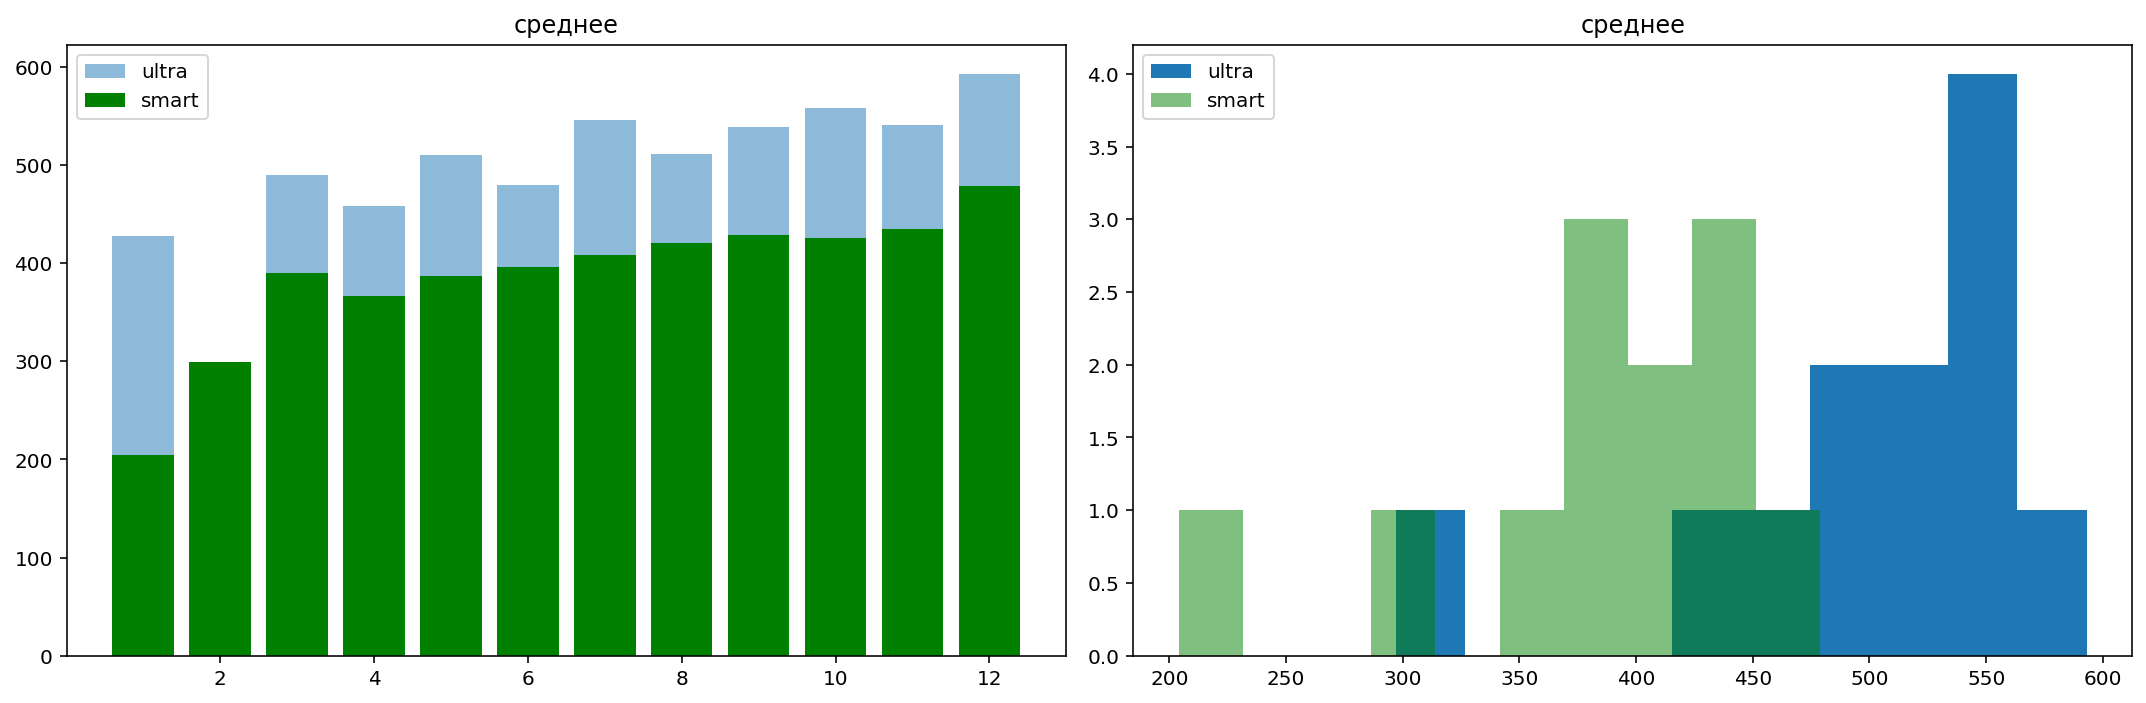

In [36]:
fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1[0].set_title('среднее')
ax1[0].bar(df_month['month'], df_month['mean_ultra'], label='ultra', alpha=0.5)
ax1[0].bar(df_month['month'], df_month['mean_smart'],color='green', label='smart')
ax1[0].legend()


ax1[1].set_title('среднее')
ax1[1].hist(df_month['mean_ultra'], 10, label='ultra')
ax1[1].hist(df_month['mean_smart'], 10, color='green', label='smart', alpha=0.5)
ax1[1].legend()

fig1.tight_layout()


Из полученных данных мы видим следующее:

    * из столбчатой диаграммы видно, что в феврале самое низкое значение по двум тарифам
    * по тарифу ультра среднее значение суммарного количества звонков примерно 480 мин, а по тарифу смарт ниже и равно 380 минт
    * максимальное количество минут в декабре по двум тарифам
    * по гистограмме можно сделать вывод, график тарифа ультра смещен в право относительно тарифа смарт

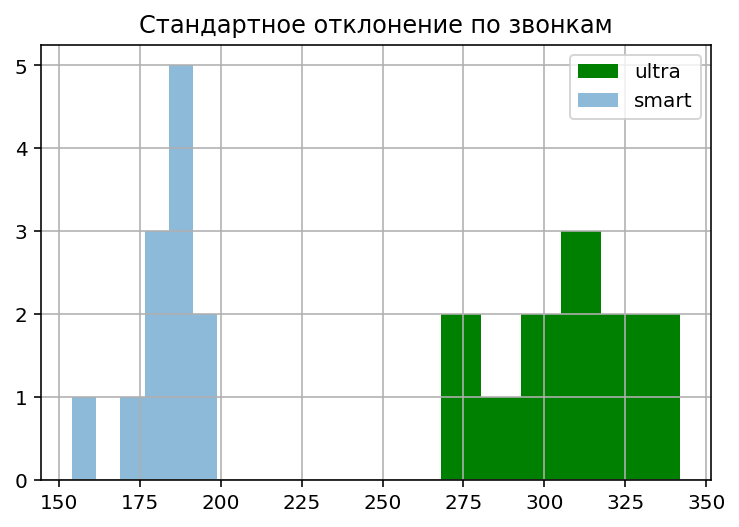

In [37]:
df_month['std_ultra'].hist(bins=6,color='green', label='ultra').set_title('Стандартное отклонение по звонкам')
df_month['std_smart'].hist(bins=6, label='smart', alpha=0.5)
plt.legend()
plt.show()

По графику стандартного отклонения видно, что "ультра" смещен правее, это говорит о том что разброс данных в этом тарифе больше.  

Теперь посмотрим как выглядят метрики по интернет трафику. Сгруппируем данные и посчитаем среднее, дисперсию и стандартное отклонение: 

In [38]:
df_month_gb=pd.pivot_table(df, index=['month'], columns=['tariff'], values=['gb_summ'], aggfunc=['mean', np.var, np.std]).reset_index().round()
df_month_gb.columns=['month', 'mean_smart', 'mean_ultra', 'var_smart', 'var_ultra', 'std_smart', 'std_ultra']
df_month_gb

,month,mean_smart,mean_ultra,var_smart,var_ultra,std_smart,std_ultra
0,1,9.0,13.0,39.0,44.0,6.0,7.0
1,2,12.0,12.0,37.0,109.0,6.0,10.0
2,3,15.0,18.0,33.0,114.0,6.0,11.0
3,4,14.0,17.0,31.0,89.0,6.0,9.0
4,5,16.0,19.0,34.0,96.0,6.0,10.0
5,6,16.0,19.0,32.0,82.0,6.0,9.0
6,7,16.0,21.0,33.0,96.0,6.0,10.0
7,8,17.0,20.0,30.0,105.0,5.0,10.0
8,9,16.0,19.0,26.0,86.0,5.0,9.0
9,10,17.0,20.0,33.0,91.0,6.0,10.0


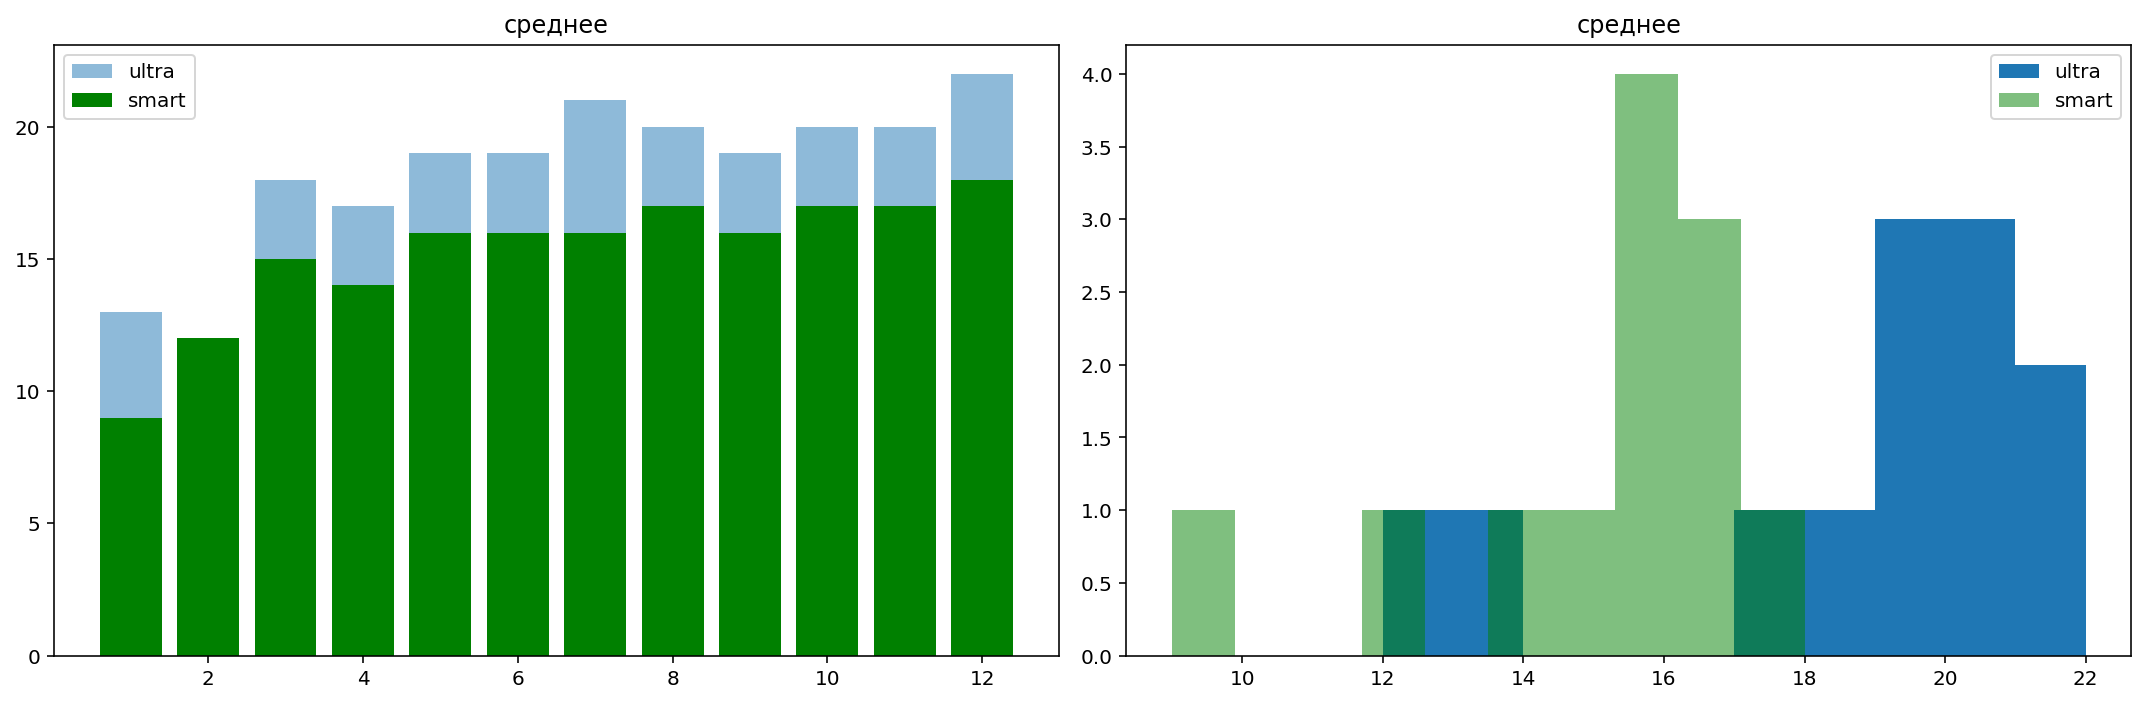

In [39]:
fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1[0].set_title('среднее')
ax1[0].bar(df_month_gb['month'], df_month_gb['mean_ultra'], label='ultra', alpha=0.5)
ax1[0].bar(df_month_gb['month'], df_month_gb['mean_smart'],color='green', label='smart')
ax1[0].legend()


ax1[1].set_title('среднее')
ax1[1].hist(df_month_gb['mean_ultra'], 10, label='ultra')
ax1[1].hist(df_month_gb['mean_smart'], 10, color='green', label='smart', alpha=0.5)
ax1[1].legend()

fig1.tight_layout()


Из полученных данных мы видим следующее:

    * из столбчатой диаграммы видно, что в феврале так же как и по звонкам одинаковый средний расход
    * минимальное значение по двум тарифам в январе и макимальное по двум тарифам в декабре
    * среднее значение по ультра 19 Гб, а у смарт в районе 16 Гб.
    * на гистограмме ультра смещен правее, что и доказывает столбчатая диаграмма. 

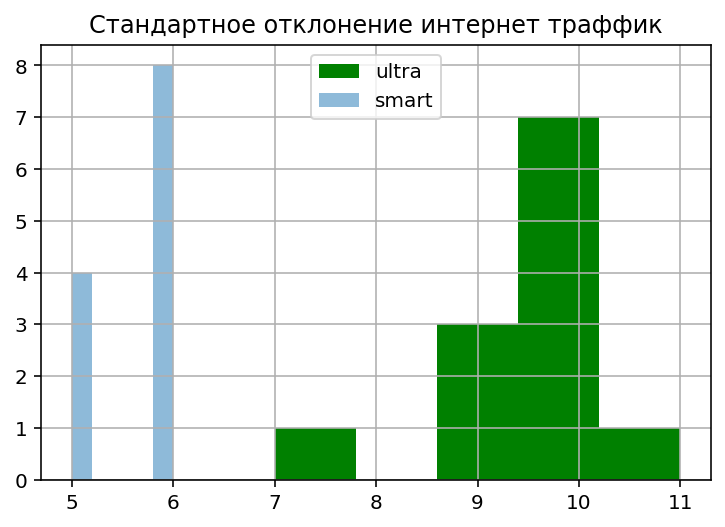

In [40]:
df_month_gb['std_ultra'].hist(bins=5,color='green', label='ultra').set_title('Стандартное отклонение интернет траффик')
df_month_gb['std_smart'].hist(bins=5, label='smart', alpha=0.5)
plt.legend()
plt.show()

Стандартное отклонение показывает, что у тарифа смарт есть два значения 5 и 6, а у тарифа ультра график смещен правее ( соответственно разброс данных больше) и имеет максимальное отклонение 10.

Теперь посмотрим как распределяются сообщения:

In [41]:
df_month_mes=pd.pivot_table(df, index=['month'], columns=['tariff'], values=['messages_sum'], aggfunc=['mean', np.var, np.std]).reset_index().round()
df_month_mes.columns=['month', 'mean_smart', 'mean_ultra', 'var_smart', 'var_ultra', 'std_smart', 'std_ultra']
df_month_mes

,month,mean_smart,mean_ultra,var_smart,var_ultra,std_smart,std_ultra
0,1,18.0,34.0,262.0,941.0,16.0,31.0
1,2,24.0,22.0,473.0,717.0,22.0,27.0
2,3,32.0,32.0,718.0,1732.0,27.0,42.0
3,4,31.0,32.0,602.0,1407.0,25.0,38.0
4,5,34.0,38.0,731.0,1625.0,27.0,40.0
5,6,33.0,42.0,807.0,1986.0,28.0,45.0
6,7,34.0,50.0,800.0,2372.0,28.0,49.0
7,8,34.0,48.0,838.0,2172.0,29.0,47.0
8,9,34.0,52.0,791.0,2153.0,28.0,46.0
9,10,34.0,58.0,816.0,2697.0,29.0,52.0


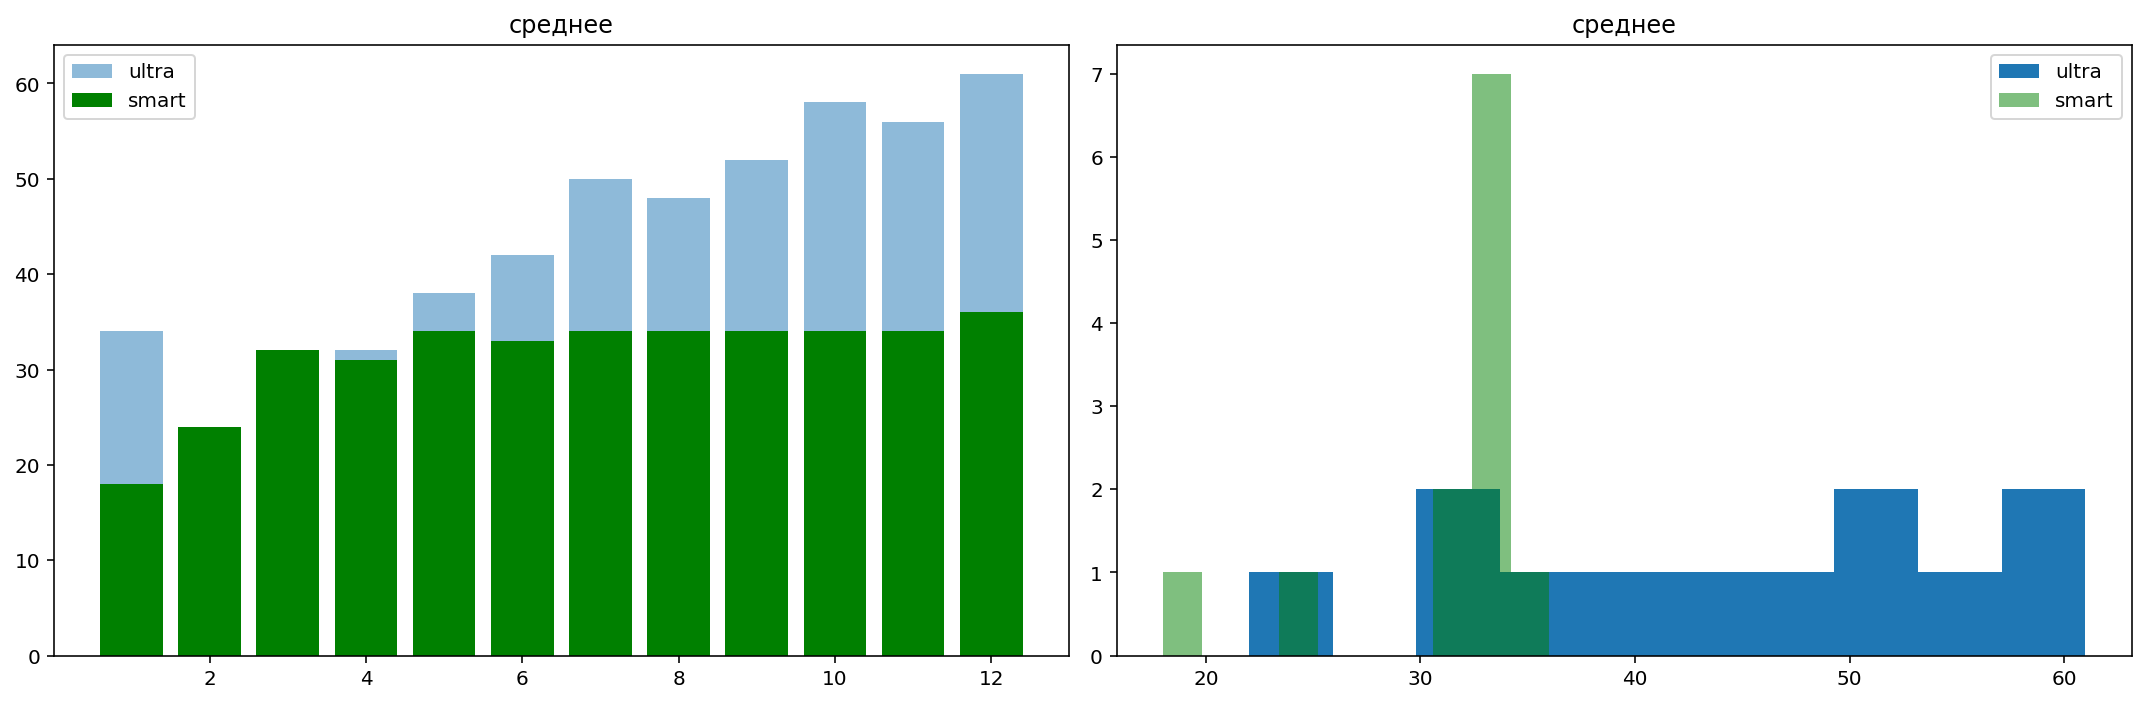

In [42]:
fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1[0].set_title('среднее')
ax1[0].bar(df_month_mes['month'], df_month_mes['mean_ultra'], label='ultra', alpha=0.5)
ax1[0].bar(df_month_mes['month'], df_month_mes['mean_smart'],color='green', label='smart')
ax1[0].legend()


ax1[1].set_title('среднее')
ax1[1].hist(df_month_mes['mean_ultra'], 10, label='ultra')
ax1[1].hist(df_month_mes['mean_smart'], 10, color='green', label='smart', alpha=0.5)
ax1[1].legend()

fig1.tight_layout()

Что мы видим:

    * тариф смарт- резкий рост до марта, потом оносительно ровное количество смс оставшийся год
    * тариф ультра - весь год рост количества сообщений, кроме просидания в феврале.
    * общее количество сообщений не превышает по двум тарифам 60 смс.

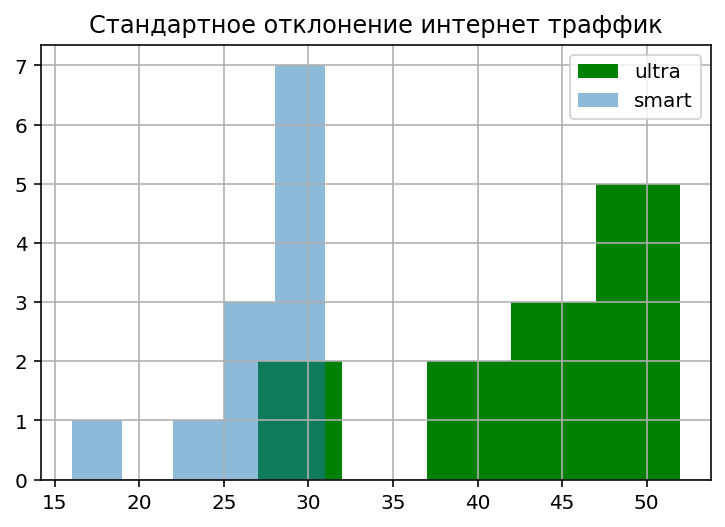

In [43]:
df_month_mes['std_ultra'].hist(bins=5,color='green', label='ultra').set_title('Стандартное отклонение интернет траффик')
df_month_mes['std_smart'].hist(bins=5, label='smart', alpha=0.5)
plt.legend()
plt.show()

Что мы видим:
    
    * график ультра смещен относительно смарт вправо, значит у ультра разброс больше.
    * оба графика имеют хвост только слева.

Общие выводы:
    * наблюдается спад в феврале по всем источникам связи.
    * по всем источникам связи расход у абонентов больше по тарифу ультра, что логично , т.к этот тариф предполгает больший пакет расхода услуг. Но если обратить внимание на то, что например звонков в тарифе ультра можно совершать в шесть раз больше, то по результатам исследования мы не наблюдаем такой большой разницы в тарифах. Что в свою очередь могу предположить, что абоненты переплачивают и не расходуют пакет. 

### Проверяем гепотезы



1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Для проверки гипотезы создадим две выборки для каждго тарифа.

In [44]:
df_ultra=df[df['tariff']=='ultra']
df_ultra

,user_id,month,calls_sum,calls_count,gb_summ,messages_sum,tariff,profit_month
0,1000,5,159.0,22.0,3.0,22.0,ultra,2254.0
1,1000,6,172.0,43.0,23.0,60.0,ultra,5254.0
2,1000,7,340.0,47.0,14.0,75.0,ultra,3904.0
3,1000,8,408.0,52.0,14.0,81.0,ultra,3904.0
4,1000,9,466.0,58.0,15.0,57.0,ultra,4054.0
...,...,...,...,...,...,...,...,...
3204,1473,9,0.0,0.0,17.0,19.0,ultra,4354.0
3205,1473,10,0.0,0.0,14.0,20.0,ultra,3904.0
3206,1473,11,0.0,0.0,22.0,14.0,ultra,5104.0
3207,1473,12,0.0,0.0,18.0,20.0,ultra,4504.0


In [45]:
df_smart=df[df['tariff']=='smart']
df_smart

,user_id,month,calls_sum,calls_count,gb_summ,messages_sum,tariff,profit_month
8,1001,11,430.0,59.0,18.0,0.0,smart,4141.0
9,1001,12,414.0,63.0,14.0,0.0,smart,3341.0
10,1002,6,117.0,15.0,11.0,4.0,smart,2741.0
11,1002,7,214.0,26.0,18.0,11.0,smart,4141.0
12,1002,8,289.0,42.0,20.0,13.0,smart,4541.0
...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,11.0,17.0,smart,2741.0
3210,1489,9,0.0,0.0,17.0,32.0,smart,3941.0
3211,1489,10,0.0,0.0,20.0,21.0,smart,4541.0
3212,1489,11,0.0,0.0,18.0,20.0,smart,4141.0


In [46]:
df_smart['profit_month'].describe()

count    2229.000000
mean     3948.994168
std      1225.731847
min       550.000000
25%      3195.000000
50%      3962.000000
75%      4741.000000
max      9761.000000
Name: profit_month, dtype: float64

In [47]:
df_ultra['profit_month'].describe()

count     985.000000
mean     4729.792893
std      1474.874041
min      1950.000000
25%      3604.000000
50%      4654.000000
75%      5854.000000
max      9154.000000
Name: profit_month, dtype: float64

Определим нулевую и альтернативную гипотезы

Н0 Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны

Н1 не равны

Используем  специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind () и возьмем equal_var = False, потому что полученные выборки разного размера

In [48]:
from scipy import stats as st
import numpy as np
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    df_ultra['profit_month'], 
    df_smart['profit_month'], equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.093416243340817e-45
Отвергаем нулевую гипотезу


2. Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Для этого добавим столбец для каждой выборки с тарифом город абонента.

In [49]:
# создадим словарь из `users` с номером абонента и город регистрации
users2=users[['user_id', 'city']]
users2.head(5)

,user_id,city
0,1000,Краснодар
1,1001,Москва
2,1002,Стерлитамак
3,1003,Москва
4,1004,Новокузнецк


In [50]:
# добавим столбец с городом из нашего словаря
df_new=df.merge(users2, on='user_id', how='left')
df_new

,user_id,month,calls_sum,calls_count,gb_summ,messages_sum,tariff,profit_month,city
0,1000,5,159.0,22.0,3.0,22.0,ultra,2254.0,Краснодар
1,1000,6,172.0,43.0,23.0,60.0,ultra,5254.0,Краснодар
2,1000,7,340.0,47.0,14.0,75.0,ultra,3904.0,Краснодар
3,1000,8,408.0,52.0,14.0,81.0,ultra,3904.0,Краснодар
4,1000,9,466.0,58.0,15.0,57.0,ultra,4054.0,Краснодар
...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,11.0,17.0,smart,2741.0,Санкт-Петербург
3210,1489,9,0.0,0.0,17.0,32.0,smart,3941.0,Санкт-Петербург
3211,1489,10,0.0,0.0,20.0,21.0,smart,4541.0,Санкт-Петербург
3212,1489,11,0.0,0.0,18.0,20.0,smart,4141.0,Санкт-Петербург


In [51]:
df_new_moscow=df_new[df_new['city']=='Москва']
df_new_moscow

,user_id,month,calls_sum,calls_count,gb_summ,messages_sum,tariff,profit_month,city
8,1001,11,430.0,59.0,18.0,0.0,smart,4141.0,Москва
9,1001,12,414.0,63.0,14.0,0.0,smart,3341.0,Москва
17,1003,8,380.0,55.0,9.0,37.0,ultra,3154.0,Москва
18,1003,9,961.0,134.0,13.0,91.0,ultra,3754.0,Москва
19,1003,10,855.0,108.0,15.0,83.0,ultra,4054.0,Москва
...,...,...,...,...,...,...,...,...,...
3119,1490,9,322.0,44.0,15.0,48.0,smart,3541.0,Москва
3120,1490,10,312.0,42.0,21.0,45.0,smart,4741.0,Москва
3121,1490,11,282.0,38.0,19.0,47.0,smart,4341.0,Москва
3122,1490,12,290.0,42.0,16.0,46.0,smart,3741.0,Москва


In [52]:
df_new_rest=df_new[df_new['city']!='Москва']
df_new_rest

,user_id,month,calls_sum,calls_count,gb_summ,messages_sum,tariff,profit_month,city
0,1000,5,159.0,22.0,3.0,22.0,ultra,2254.0,Краснодар
1,1000,6,172.0,43.0,23.0,60.0,ultra,5254.0,Краснодар
2,1000,7,340.0,47.0,14.0,75.0,ultra,3904.0,Краснодар
3,1000,8,408.0,52.0,14.0,81.0,ultra,3904.0,Краснодар
4,1000,9,466.0,58.0,15.0,57.0,ultra,4054.0,Краснодар
...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,11.0,17.0,smart,2741.0,Санкт-Петербург
3210,1489,9,0.0,0.0,17.0,32.0,smart,3941.0,Санкт-Петербург
3211,1489,10,0.0,0.0,20.0,21.0,smart,4541.0,Санкт-Петербург
3212,1489,11,0.0,0.0,18.0,20.0,smart,4141.0,Санкт-Петербург


Н0 Cредняя выручка пользователей из Москвы равна средней выручки пользователей из других регионов
Н1 не равны

Используем  специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind () и возьмем equal_var = False, потому что полученные выборки разного размера

In [53]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    df_new_moscow['profit_month'], 
    df_new_rest['profit_month'], equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.017620058337004203
Отвергаем нулевую гипотезу


Следовательно средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

ВЫВОД:
    
Мы провели исследование об определении перспективного тарифа для телеком-компании, для этого у нас была выборка из 500 кkиентов и их история за 2018 год. Мы проверили данные на пропуски и дубликаты, провели необходимые дополнительные расчеты. В пкзультате проведенных исследований на выборке мы получили следущее:

* средний расход по месяцам у клиентов (звонки, смс и интернет) больше по тарифу "ультра" больше чем "смарт", но и стандартное отклонение также больше у "ультра", то есть расброс фактов потребления выше . это говорит о том, что клиенты менее предсказуемы и прогнозировать выручку по таким клиентам сложнее
* судя по средней выручке по клиентам в данной выборке можно сделать вывод, что клиенты с тарифом "смарт" в среднем выходят за пределы включенного пакета услуг. А вот клиенты с тарифом "ультра" наоборот судя по средним количствам звонков, смс и трафика чаще всего не выходят и даже большую часть не расходуют пакет услуг.
* если обратим внимание на Межквартильный размах в данной выборке по выручке, то увидим, что клиенты с тарифом "ультра" приносят компании от 3600 до 5800, а смарт от 3100 до 4700.

Подведем итоги,  с точки зрения прибыли для компании выгоднее тариф ультра. Но с точки зрения привлечения клиентов, я бы предложила создать тариф более ориентированный на клиента, тк тариф ультра показал, что клиенты плятят больше, но по минутам сильно не расходуют пакет. А у клиентов тарифа смарт чаще всего идет перерасход пакета судя по выручке, что тоже может также негативно влиять на отношение клиентов к данному тарифу.

Далее мы выдвинули две гипотезы:
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются - мы можем утверждать, что с большой долей вероятности  средние двух генеральных совокупностей между собой различаются
2. Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов - мы можем также утверждать, что с большой долей вероятности  средние двух генеральных совокупностей между собой различаются 